<a href="https://colab.research.google.com/github/Kanyinsola-O/CE888/blob/main/Lab%203/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [8]:

df0=pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter= ";")
df=df0.copy()

features = ["age",
            "job", 
            "marital",
            "default",
            "housing",
            "loan",
            "contact",
            "month", 
            "day_of_week", 
            "duration",
            "campaign",
            "pdays", 
            "previous", 
            "poutcome",
            "emp.var.rate",
            "cons.price.idx",
            "cons.conf.idx",
            "euribor3m",
            "nr.employed",
             "y"]
df[features].head()         


,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
outcomes= ["y"]


df[outcomes].head()

print(df[outcomes[-3:]].head().to_latex())

\begin{tabular}{ll}
\toprule
{} &   y \\
\midrule
0 &  no \\
1 &  no \\
2 &  no \\
3 &  no \\
4 &  no \\
\bottomrule
\end{tabular}



In [34]:

df[["job"]] = df[["job"]].apply(LabelEncoder().fit_transform)

df_dummies = pd.get_dummies(df)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
df=df.drop(columns=["duration"])

In [26]:
df_dummies = pd.get_dummies(df)

print(df)

       age          job  marital  ... euribor3m nr.employed    y
0       56    housemaid  married  ...     4.857      5191.0   no
1       57     services  married  ...     4.857      5191.0   no
2       37     services  married  ...     4.857      5191.0   no
3       40       admin.  married  ...     4.857      5191.0   no
4       56     services  married  ...     4.857      5191.0   no
...    ...          ...      ...  ...       ...         ...  ...
41183   73      retired  married  ...     1.028      4963.6  yes
41184   46  blue-collar  married  ...     1.028      4963.6   no
41185   56      retired  married  ...     1.028      4963.6   no
41186   44   technician  married  ...     1.028      4963.6  yes
41187   74      retired  married  ...     1.028      4963.6   no

[41188 rows x 20 columns]


In [47]:
import pandas as pd
 

df= df.dropna()
print(df)

outcomes_of_interest = ["y"]
n_bins = 20

X_df = df_dummies.copy()
y_df = df_dummies['y'].copy()

#print X_df.head().to_latex()

#print y_df.values
bins =  pd.qcut(y_df['y'[0]].values,n_bins)

y_df = df['y'].copy()
y_df['y'[0]] = bins

y_df['y'] = y_df['y'].apply(LabelEncoder().fit_transform)

print(y_df.head())

       age  job  marital  ... euribor3m nr.employed    y
0       56    3  married  ...     4.857      5191.0   no
1       57    7  married  ...     4.857      5191.0   no
2       37    7  married  ...     4.857      5191.0   no
3       40    0  married  ...     4.857      5191.0   no
4       56    7  married  ...     4.857      5191.0   no
...    ...  ...      ...  ...       ...         ...  ...
41183   73    5  married  ...     1.028      4963.6  yes
41184   46    1  married  ...     1.028      4963.6   no
41185   56    5  married  ...     1.028      4963.6   no
41186   44    9  married  ...     1.028      4963.6  yes
41187   74    5  married  ...     1.028      4963.6   no

[41188 rows x 20 columns]


KeyError: ignored

In [ ]:
#Changing outcome of interst to array instead of string to suit scikit learn
import numpy as np

outcome_of_interest= ["y"]
np.array = outcome_of_interest
display (np.array)

['y']

In [11]:
X = X_df.values
y = y_df.values.T[0]

y_df['id'] = range(1, len(df) + 1)

y_df.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

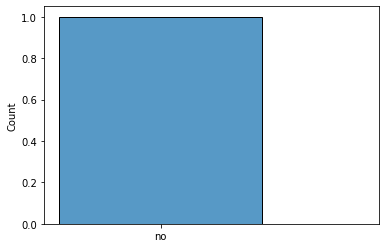

In [18]:
sns_plot = sns.histplot(y, kde=False)

#sns_plot.savefig("histogram_lpc.pdf", bbox_inches='tight')

In [10]:
print("Number of rows before dropping NaNs: %d" % len(df))
df = df.dropna()
print("Number of rows after dropping NaNs: %d" % len(df))

Number of rows before dropping NaNs: 41188
Number of rows after dropping NaNs: 41188


In [48]:
from sklearn.model_selection import train_test_split 
x=df_dummies.iloc[:,:].values
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size = 0.2, random_state=50)

ValueError: ignored

In [ ]:
print(df.columns)
features = []

print (df[features].head())

In [ ]:
y_df[''] = range(1, len(df) + 1)  # add a column
sns_plot = sns.lmplot(x="", y="", data=y_df, fit_reg=False, aspect=2)

# sns_plot.savefig("scaterplot_lpc.pdf", bbox_inches='tight')

In [ ]:
X = X_df.values
y = y_df.values.T[0]
y = (y - y.min())/(y.max() - y.min())  # standardise the target variable

In [ ]:
clf = DecisionTreeRegressor()
clf.fit(X, y)
print("MSE of the model = %1.4g" % mse(y, clf.predict(X)))

In [ ]:
n_test = 100
n_repeat = 1000

estimator = DecisionTreeRegressor()
#estimator = RandomForestRegressor()

# Compute predictions
y_predicts = np.ones((n_repeat, len(X))) * np.nan

for i in range(n_repeat):
    sample  = np.random.choice(range(len(X)), replace=True, size=len(X))  # bootstrap!
    train_ids = sample[:-n_test]
    test_ids  = sample[-n_test:]
    test_ids = np.setdiff1d(test_ids, train_ids)  # only use those that weren't in the training set for testing
    if len(test_ids) == 0:
        continue
    X_train, y_train = X[train_ids], y[train_ids]
    X_test, y_test = X[test_ids], y[test_ids]
    
    estimator.fit(X_train, y_train)
    y_predict = estimator.predict(X_test)
    y_predicts[i, test_ids] = y_predict

In [ ]:
y_bias = (y - np.nanmean(y_predicts, axis=0)) **2
y_error = np.nanmean((y - y_predicts) **2, axis=0)#.mean()
y_var = np.nanvar(y_predicts, axis=0, ddof = 1)

print(np.nanmean(y_bias) +  np.nanmean(y_var))

clf_type = "Decision tree"
print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
          "+ {3:.4f} (var)".format(clf_type, np.nanmean(y_error), np.nanmean(y_bias), np.nanmean(y_var)))

print("{0}: {1:.4f} ((bias^2) + (var)) = {2:.4f} (bias^2) "
          "+ {3:.4f} (var)".format(clf_type, np.mean(y_bias) + np.mean(y_var), np.mean(y_bias), np.mean(y_var)))

In [ ]:
#clf = RandomForestRegressor(n_estimators=1000,max_depth=2)
clf = BayesianRidge(normalize=True)
scores = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(mse))

dummy_clf = DummyRegressor(strategy='mean')
dummy_scores = cross_val_score(dummy_clf, X, y, cv=10, scoring = make_scorer(mse))

print("MSE: %0.8f +/- %0.8f" % (scores.mean(), scores.std()))
print("Dummy MSE: %0.8f +/- %0.8f" % (dummy_scores.mean(), dummy_scores.std()))


In [ ]:
#copy of the orginal data set 


In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter= ";")

features = ["age",
            "job", 
            "marital",
            "default",
            "housing",
            "loan",
            "contact",
            "month", 
            "day_of_week", 
            "duration",
            "campaign",
            "pdays", 
            "previous", 
            "poutcome",
            "emp.var.rate",
            "cons.price.idx",
            "cons.conf.idx",
            "euribor3m",
            "nr.employed",
             "y"]
df[features].head()         

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
